### Import Libraries

In [1]:
import pandas as pd
from pomegranate import *

### Read Data

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')

In [3]:
print(data.shape)
data.head()

(400, 5)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Pre-processing
- The data was manually checked and no missing values were found.
- The data was manually checked and no duplicates were found. The user id does not repeat.
- Convert all continous attributes to discrete attributes and the package pomegranate only supports discrete values.

<AxesSubplot:>

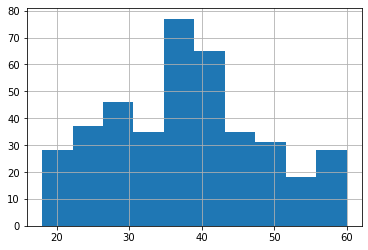

In [4]:
data.Age.hist()

<AxesSubplot:>

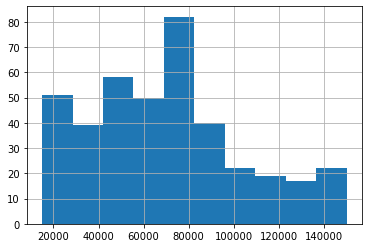

In [5]:
data.EstimatedSalary.hist()

In [6]:
# categorize the Age as group1, group2 , group3
# categorize the Salary as low, medium, high

def categorize_age(age):
    if age <= 30:
        return 'group 1'
    if age <= 45:
        return 'group 2'  
    return 'group 3'

def categorise_salary(salary):
    if salary <= 40000:
        return 'low'
    if salary <= 80000:
        return 'medium'  
    return 'high'    

In [7]:
data_transformed = data.copy()
data_transformed['Age'] = data_transformed['Age'].apply(categorize_age)
data_transformed['EstimatedSalary'] = data_transformed['EstimatedSalary'].apply(categorise_salary)

In [8]:
data_transformed.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,group 1,low,0
1,15810944,Male,group 2,low,0
2,15668575,Female,group 1,medium,0
3,15603246,Female,group 1,medium,0
4,15804002,Male,group 1,medium,0


- Here the dependent variable is Purchased.
- Purchased depends on all other variables.
- All other variables are independent

### Find Probabilities
- conditional probability P(C|E) = P(C,E)/P(E)

In [9]:
data_transformed['Evidence'] = data_transformed['Gender'] +'-'+ data_transformed['Age'] +'-'+ data_transformed['EstimatedSalary']
prob_evidence = data_transformed.groupby('Evidence').size().div(len(data_transformed))
prob_evidence # P(E)

Evidence
Female-group 1-high      0.0400
Female-group 1-low       0.0400
Female-group 1-medium    0.0525
Female-group 2-high      0.0625
Female-group 2-low       0.0250
Female-group 2-medium    0.1375
Female-group 3-high      0.0775
Female-group 3-low       0.0475
Female-group 3-medium    0.0275
Male-group 1-high        0.0500
Male-group 1-low         0.0400
Male-group 1-medium      0.0550
Male-group 2-high        0.0525
Male-group 2-low         0.0325
Male-group 2-medium      0.1550
Male-group 3-high        0.0375
Male-group 3-low         0.0325
Male-group 3-medium      0.0350
dtype: float64

In [10]:
data_transformed['Purchased'] = data_transformed['Purchased'].apply(str)
prob_conditional = data_transformed.groupby(['Evidence', 'Purchased']).size().div(len(data_transformed)).div(prob_evidence, axis=0, level='Evidence')
prob_conditional # P(C|E)

Evidence               Purchased
Female-group 1-high    0            0.875000
                       1            0.125000
Female-group 1-low     0            1.000000
Female-group 1-medium  0            1.000000
Female-group 2-high    0            0.240000
                       1            0.760000
Female-group 2-low     0            0.900000
                       1            0.100000
Female-group 2-medium  0            0.927273
                       1            0.072727
Female-group 3-high    0            0.161290
                       1            0.838710
Female-group 3-low     0            0.052632
                       1            0.947368
Female-group 3-medium  0            0.363636
                       1            0.636364
Male-group 1-high      0            0.800000
                       1            0.200000
Male-group 1-low       0            1.000000
Male-group 1-medium    0            1.000000
Male-group 2-high      0            0.142857
                      

In [11]:
prob_conditional = prob_conditional.reset_index()
prob_conditional.columns = ['Evidence', 'Purchased', 'conditional_prob']
prob_conditional

,Evidence,Purchased,conditional_prob
0,Female-group 1-high,0,0.875000
1,Female-group 1-high,1,0.125000
2,Female-group 1-low,0,1.000000
3,Female-group 1-medium,0,1.000000
4,Female-group 2-high,0,0.240000
5,Female-group 2-high,1,0.760000
6,Female-group 2-low,0,0.900000
7,Female-group 2-low,1,0.100000
8,Female-group 2-medium,0,0.927273
9,Female-group 2-medium,1,0.072727


In [12]:
def conditional_prob_transform(evidence,purchase,conditional_prob):
    return(evidence.split('-') + [purchase] + [conditional_prob])
        
conditional_prob_transformed = prob_conditional.apply(lambda x: conditional_prob_transform(x['Evidence'],x['Purchased'],x['conditional_prob']),axis=1)
conditional_prob_transformed = conditional_prob_transformed.to_list()

In [13]:
conditional_prob_transformed

[['Female', 'group 1', 'high', '0', 0.8750000000000001],
 ['Female', 'group 1', 'high', '1', 0.125],
 ['Female', 'group 1', 'low', '0', 1.0],
 ['Female', 'group 1', 'medium', '0', 1.0],
 ['Female', 'group 2', 'high', '0', 0.24],
 ['Female', 'group 2', 'high', '1', 0.76],
 ['Female', 'group 2', 'low', '0', 0.8999999999999999],
 ['Female', 'group 2', 'low', '1', 0.09999999999999999],
 ['Female', 'group 2', 'medium', '0', 0.9272727272727272],
 ['Female', 'group 2', 'medium', '1', 0.07272727272727272],
 ['Female', 'group 3', 'high', '0', 0.16129032258064518],
 ['Female', 'group 3', 'high', '1', 0.8387096774193549],
 ['Female', 'group 3', 'low', '0', 0.05263157894736842],
 ['Female', 'group 3', 'low', '1', 0.9473684210526315],
 ['Female', 'group 3', 'medium', '0', 0.36363636363636365],
 ['Female', 'group 3', 'medium', '1', 0.6363636363636365],
 ['Male', 'group 1', 'high', '0', 0.7999999999999999],
 ['Male', 'group 1', 'high', '1', 0.19999999999999998],
 ['Male', 'group 1', 'low', '0', 1.0],

- A few combinations are missing in this data. This can be added after a manual check

In [14]:
missing_comb = [ ['Male', 'group 1', 'low', '1', 0],
 ['Male', 'group 3', 'low', '0', 0],
 ['Female', 'group 1', 'low', '1', 0],
 ['Female', 'group 1', 'medium', '1', 0],
 ['Male', 'group 1', 'medium', '1', 0]]
conditional_prob_transformed = conditional_prob_transformed + missing_comb

In [15]:
male_prob = data_transformed.groupby('Gender').size().div(len(data_transformed)).reset_index()[0][0]
female_prob = data_transformed.groupby('Gender').size().div(len(data_transformed)).reset_index()[0][1]
age1_prob = data_transformed.groupby('Age').size().div(len(data_transformed)).reset_index()[0][0]
age2_prob = data_transformed.groupby('Age').size().div(len(data_transformed)).reset_index()[0][1]
age3_prob = data_transformed.groupby('Age').size().div(len(data_transformed)).reset_index()[0][2]
high_prob = data_transformed.groupby('EstimatedSalary').size().div(len(data_transformed)).reset_index()[0][0]
low_prob = data_transformed.groupby('EstimatedSalary').size().div(len(data_transformed)).reset_index()[0][1]
medium_prob = data_transformed.groupby('EstimatedSalary').size().div(len(data_transformed)).reset_index()[0][2]

### Discrete Probability Distribution & Conditional Probability distribution

In [16]:
gender = DiscreteDistribution({'Male': male_prob, 'Female': female_prob})
age = DiscreteDistribution({'group 1': age1_prob, 'group 2': age2_prob, 'group 3': age3_prob})
salary = DiscreteDistribution({'low': low_prob, 'medium': medium_prob, 'high': high_prob})
purchased = ConditionalProbabilityTable(conditional_prob_transformed, [gender, age,salary])

### Initialize State & Model

In [17]:
s1 = Node(gender, name="gender")
s2 = Node(age, name="age")
s3 = Node(salary, name="salary")
s4 = Node(purchased, name="purchased")

model = BayesianNetwork("Customer Purchase Prediction")
model.add_states(s1, s2, s3, s4)
model.add_edge(s1, s4)
model.add_edge(s2, s4)
model.add_edge(s3, s4)
model.bake()
print("Bayesian Network initialized")

Bayesian Network initialized


### Predict whether the customer purchased things or not using the following data
- Female Customer who is 33 years old with Rs. 33000/- salary

In [18]:
gender_ = 'Female'
salary_ = categorise_salary(33000)
age_ = categorize_age(33)
result = model.predict([[gender_, age_,salary_, None]])
if list(result[0])[-1] == '0':
    print("Customer does not purchase things")
else:
    print("Customer does purchases things")

Customer does not purchase things


<ipython-input-18-b3f1199eba6f>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = model.predict([[gender_, age_,salary_, None]])


### Infer the probability for the data with the following properties
- A 32-year-old male with Rs. 1,15,000/- salary and who purchased nothing

In [19]:
gender_ = 'Male'
salary_ = categorise_salary(115000)
age_ = categorize_age(32)
purchased_ = '0'
result = model.probability([[gender_, age_,salary_, purchased_]])
print('Probability for the given data is '+ str(result))

Probability for the given data is 0.010841142857142853


### Find the probability of the customer purchasing the product with the following attribute values
- Age 50, salary Rs.10000/- and Gender male

In [20]:
gender_ = 'Male'
salary_ = categorise_salary(10000)
age_ = categorize_age(50)
purchased_ = '1'
result = model.probability([[gender_, age_,salary_, purchased_]])
print('Probability for the given data is '+ str(result))

Probability for the given data is 0.028563187499999993
